# Heart Disease Prediction

## 1.Import Essential Libraries

In [ ]:
# Import the needed lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

## 2.Importing our dataset

In [ ]:
## Load the dataset using read_csv
heart_disease=pd.read_csv("heart-disease.csv")

In [ ]:
## See wheather the dataset has  been loaded
heart_disease #Note: If the data is not in numeric form convert them to number before using it

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
type(heart_disease) # Veriying it as  dataframe object in pandas

pandas.core.frame.DataFrame

In [ ]:
heart_disease.shape # shape of dataset

(303, 14)

In [ ]:
## For our convinient we are going to view first 5 rows of our dataset
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_disease.describe() ## This will give us the statistical summary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
## check wheather our data has missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_disease.info() # information about heart_disease

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# 3.Checking the correlation

In [ ]:
heart_disease.corr()["target"].abs().sort_values(ascending=False)


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

In [ ]:
# "fbs" is less correlated

In [ ]:
correlation=heart_disease.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


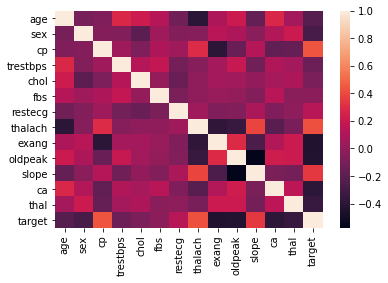

In [ ]:
import seaborn as sns
sns.heatmap(correlation)

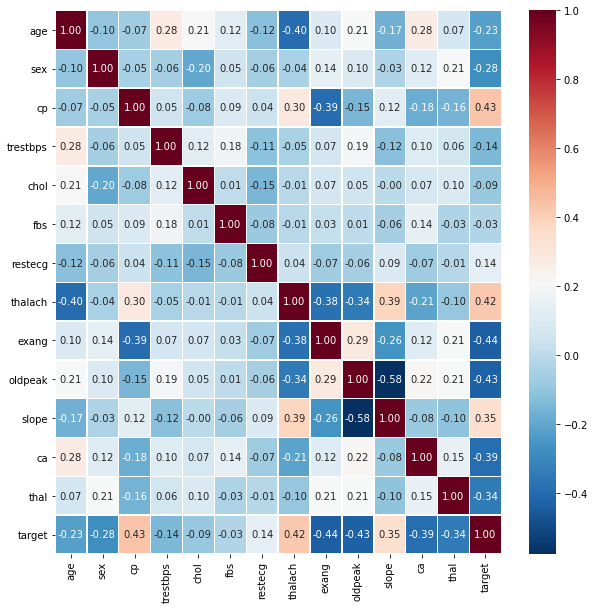

In [ ]:
## Customizing Correlation Matrix
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(correlation,
               annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="RdBu_r")


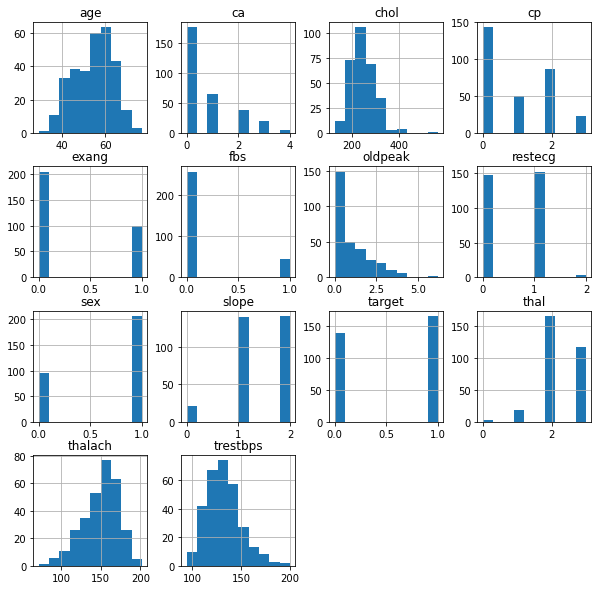

In [ ]:
heart_disease.hist(figsize=(10,10));

# 4. Exploratory Data Analysis

## First Analysing the target value

In [ ]:
## Before analysing it split the dataset into x and y
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

1    165
0    138
Name: target, dtype: int64


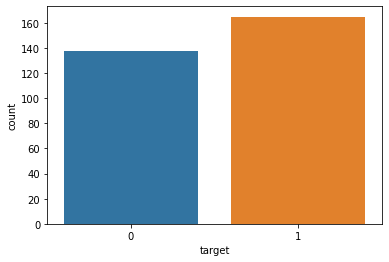

In [ ]:
# now we can analyse the data
import seaborn as sns
sns.countplot(y)
target_temp=heart_disease.target.value_counts() # to find the percentage
print(target_temp)

In [ ]:
print(f"Percentage of patient without heart disease:{target_temp[0]*100/303:.2f}%")
print(f"Percentage of patient with heart disease:{target_temp[1]*100/303:.2f}%")

Percentage of patient without heart disease:45.54%
Percentage of patient with heart disease:54.46%


### Analysing Each Feature Separately

In [ ]:
#Analysis of sex
heart_disease["sex"].unique()

array([1, 0], dtype=int64)

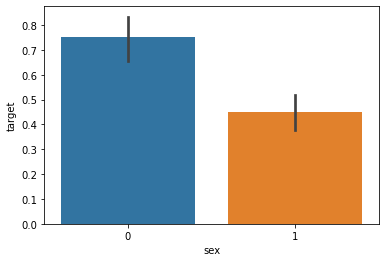

In [ ]:
sns.barplot(heart_disease["sex"],y)

#### We notice, that female are more likely to have heart problems than male

In [ ]:
## Analysing Chest Pain 
heart_disease["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

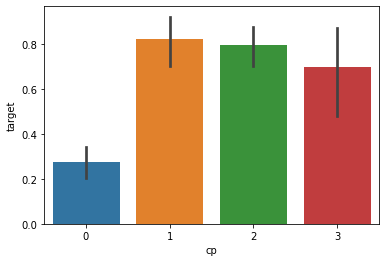

In [ ]:
sns.barplot(heart_disease["cp"],y)

#### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems


In [ ]:
# Analysing FBS
heart_disease["fbs"].unique()

array([1, 0], dtype=int64)

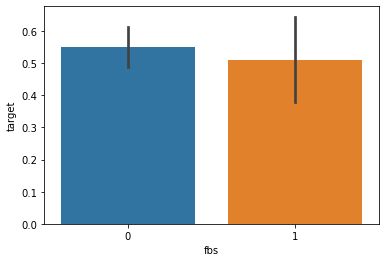

In [ ]:
sns.barplot(heart_disease["fbs"],y)

#### Nothing Extraordinary

In [ ]:
## Analysing CA
heart_disease["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

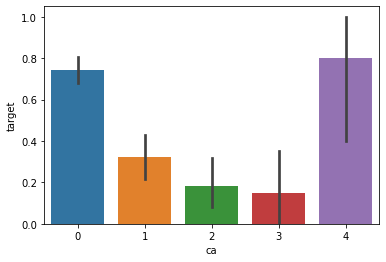

In [ ]:
sns.barplot(heart_disease["ca"],y)

In [ ]:
# Analysing  thal
heart_disease["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

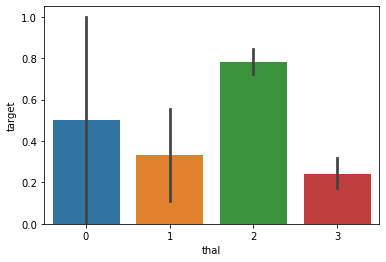

In [ ]:
sns.barplot(heart_disease["thal"],y)

In [ ]:
#Analysing Restecg
heart_disease["restecg"].unique()

array([0, 1, 2], dtype=int64)

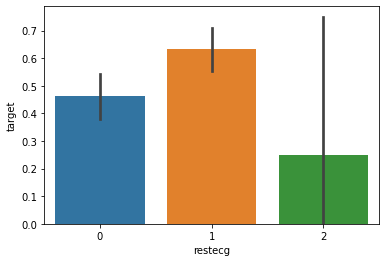

In [ ]:
sns.barplot(heart_disease["restecg"],y)


#### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2

In [ ]:
##Analysing exang
heart_disease["exang"].unique()

array([0, 1], dtype=int64)

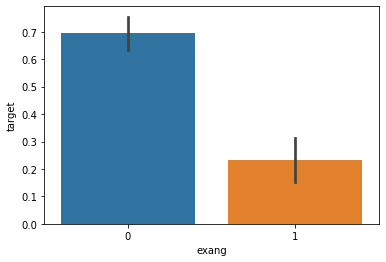

In [ ]:
sns.barplot(heart_disease["exang"],y)

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

In [ ]:
## Analysing slope
heart_disease["slope"].unique()

array([0, 2, 1], dtype=int64)

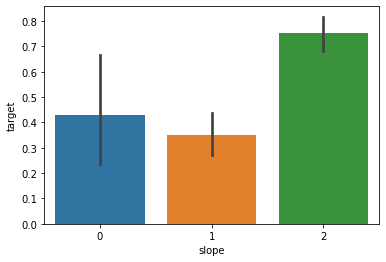

In [ ]:
sns.barplot(heart_disease["slope"],y)

We observe that people with slope 2  causes heart pain more than slope 1 and 2 

# 5. Train Test Split

In [ ]:
## Spliting the data into training and testing sets
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [ ]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [ ]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

# 6. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


lr=LogisticRegression()

lr.fit(x_train,y_train)

y_preds_lr=lr.predict(x_test)

In [ ]:
y_preds_lr.shape

(61,)

In [ ]:
y_preds_lr

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
score_lr = round(accuracy_score(y_preds_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %


#### The accuracy is not that good so we can either tune our model or use another algorithm

## SVM

In [ ]:
from sklearn import svm

sv=svm.SVC(kernel="linear")

sv.fit(x_train,y_train)

y_preds_svm=sv.predict(x_test)

In [ ]:
y_preds_svm.shape

(61,)

In [ ]:
score_svm = round(accuracy_score(y_preds_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 86.89 %


#### Not satisfied with this accuracy 

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_preds=clf.predict(x_test)
clf.score(x_test,y_test)

0.8360655737704918

In [ ]:
y_preds.shape

(61,)

In [ ]:
score_clf = round(accuracy_score(y_preds,y_test)*100,2)

print("The accuracy score achieved using Random forest  is: "+str(score_svm)+" %")

The accuracy score achieved using Random forest  is: 86.89 %


### Evaluating RandomForestClassifier

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)

confusion_matrix(y_test,y_preds)

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,5,27


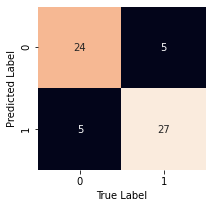

In [ ]:
# Customizing the confusion matrix
import matplotlib.pyplot as plt
conf=confusion_matrix(y_test,y_preds)

def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix using seaborn heatmap().

    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf,
                  annot=True, # Annotate the boxes with conf_mat info
                  cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");
    
plot_conf_mat(conf)

In [ ]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,scoring="accuracy")
print(f"The cross-validate accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validate accuracy is: 82.48%


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:

# Evaluation
print("Classifier  Metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}")
print(f"Precision:{precision_score(y_test,y_preds)}")
print(f"Recall:{recall_score(y_test,y_preds)}")
print(f"F1 score:{f1_score(y_test,y_preds)}")

Classifier  Metrics on the test set
Accuracy:83.61
Precision:0.84375
Recall:0.84375
F1 score:0.84375


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[10,100,200,500,1000,1200],
     "max_depth":[ None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(43)




clf=RandomForestClassifier(n_jobs=1)

#Set up Randomized
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,
                         cv=5,
                         verbose=2)

rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, m

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   1.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   1.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   1.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   1.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   1.1s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [ ]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [ ]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparision on y_true labels vs y_preds labels.
    on a classification model.
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
               "precision":round(precision,2),
               "recall":round(recall,2),
               "f1":round(f1,2)}
    print(f"Accuracy:{accuracy*100:2f}%")
    print(f"Precision:{precision:2f}")
    print(f"Recall:{recall:2f}")
    print(f"F1:{f1:2f}")
    
    return metric_dict

In [ ]:
# Make baseline predictions
y_preds_1=rs_clf.predict(x_test)

#Evaluation 
rs_metrics=evaluate_preds(y_test,y_preds_1)
rs_metrics

Accuracy:80.327869%
Precision:0.857143
Recall:0.750000
F1:0.800000


{'accuracy': 0.8, 'precision': 0.86, 'recall': 0.75, 'f1': 0.8}

In [ ]:
grid1={"n_estimators":[10,200,500],
     "max_depth":[ None,20],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2],
     "min_samples_leaf":[4]}

In [ ]:
from sklearn.model_selection import GridSearchCV,train_test_split


np.random.seed(43)


clf=RandomForestClassifier(n_jobs=1)

#Set up GridSearch
gs_clf=GridSearchCV(estimator=clf,
                         param_grid=grid1,
                         cv=5,
                         verbose=2)

gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=a

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   32.4s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [2],
                         'n_estimators': [10, 200, 500]},
             verbose=2)

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
gs_y_preds=gs_clf.predict(x_test)

gs_metrics=evaluate_preds(y_test,gs_y_preds)

Accuracy:85.245902%
Precision:0.848485
Recall:0.875000
F1:0.861538


In [ ]:
score_gs_clf = round(accuracy_score(gs_y_preds,y_test)*100,2)

print("The accuracy score achieved using Grid Search Random forest  is: "+str(score_svm)+" %")

The accuracy score achieved using Grid Search Random forest  is: 86.89 %


In [ ]:
scores = [score_lr,score_svm,score_clf,score_gs_clf]
algorithms = ["Logistic Regression","Support Vector Machine","Random Forest","GrisSearch Random Forest"]   

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %
The accuracy score achieved using Support Vector Machine is: 86.89 %
The accuracy score achieved using Random Forest is: 83.61 %
The accuracy score achieved using GrisSearch Random Forest is: 85.25 %


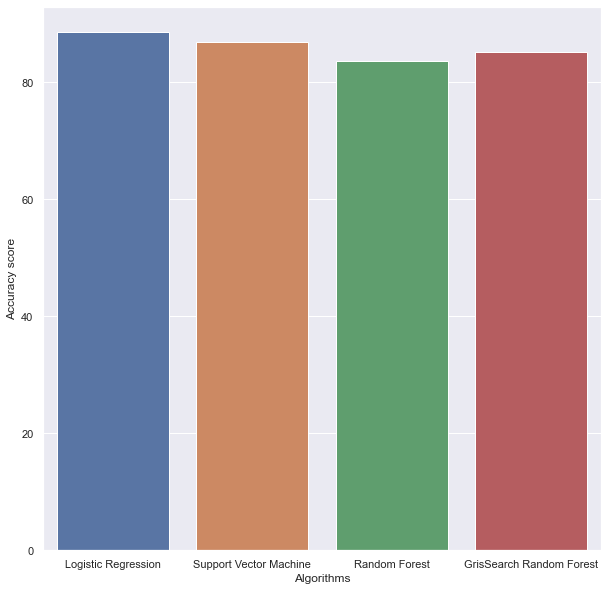

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## Logistic Regression has a good result